# Image Captioning
* Generating Captions for Images.

# Steps
* Data collection
* Understanding the data
* Data Cleaning
* Loading the training set
* Data Preprocessing — Images
* Data Preprocessing — Captions
* Data Preparation using Generator Function
* Word Embeddings
* Model Architecture
* Inference

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
import keras
import nltk
import collections
from keras.applications.resnet50 import ResNet50
plt.style.use('seaborn')

Using TensorFlow backend.


In [2]:
def readTextFile(path):
    with open(path) as f:
        captions = f.read()
    return captions

captions = readTextFile("Flickr8k.token.txt").split("\n")[:-1]
print(len(captions))

40460


In [3]:
captions[0]

'1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .'

# Dictianory to Map each Image with the list of captions 

In [4]:
def getKeyNValue(x):
    key = (x.split("\t")[0]).split('.')[0]
    value = x.split("\t")[1]
    return key,value

In [5]:
descriptions = {}

for i in captions:
    key,value = getKeyNValue(i)
    
    if key not in descriptions:
        descriptions[key]  = []
    
    descriptions[key].append(value)

In [6]:
descriptions["1000268201_693b08cb0e"]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

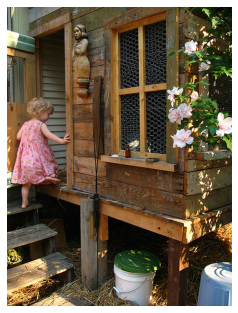

In [7]:
def showImage(img_name):
    IMG_PATH = "Images/"
    img = plt.imread(IMG_PATH+img_name+".jpg")
    plt.imshow(img)
    plt.axis('off')
    plt.show()

showImage("1000268201_693b08cb0e")

In [8]:
def clean_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub("[^a-z]+"," ",sentence)
    sentence = sentence.split()
    
    sentence = [s for s in sentence if len(s)>1]
    sentence = " ".join(sentence)
    return sentence

In [9]:
clean_text("A child in a pink dress is @ climbing up a set of stairs in an entry way 124.")

'child in pink dress is climbing up set of stairs in an entry way'

In [10]:
for key,value in descriptions.items():
    for i in range(len(value)):
        descriptions[key][i] = clean_text(value[i])

In [11]:
descriptions["1000268201_693b08cb0e"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

# Write Data in Text File

In [12]:
with open("description.txt",'w') as f:
    f.write(str(descriptions))

# Vocabulary

In [13]:
descriptions = None
with open("description.txt",'r') as f:
    descriptions = f.read()

descriptions = json.loads(descriptions.replace("'","\""))

In [14]:
all_words = []
for key in descriptions.keys():
    [all_words.append(word) for sent in descriptions[key] for word in sent.split()]
vocab = set(all_words)
print("Vocab Length : ",len(vocab))
print("Total Number Of Words : ",len(all_words))

Vocab Length :  8424
Total Number Of Words :  373837


# Sort according to the frequency & Filter Word from the vocab according to certain threshold frequency

In [15]:
counter = collections.Counter(all_words)
freq_cnt = dict(counter)
print(freq_cnt["street"])
sorted_freq_cnt = sorted(freq_cnt.items(),key=lambda x:x[1],reverse = True)

threshold = 10
sorted_freq_cnt = [ x for x in sorted_freq_cnt if x[1]>threshold ]
all_words = [ x for x in sorted_freq_cnt]
print("All Words " ,len(all_words))

944
All Words  1845


In [16]:
with open("Flickr_8k.trainImages.txt",'r') as f:
    train_data = f.read()

with open("Flickr_8k.testImages.txt",'r') as f:
    test_data = f.read()

train_data = [x.split('.')[0] for x in (train_data.split("\n")[:-1])]
test_data  = [x.split('.')[0] for x in (test_data.split("\n")[:-1])]

In [17]:
train_desc = {}
for img_id in train_data:
    train_desc[img_id]=[]
    for i in range(len(descriptions[img_id])):
        changed_cap = "startseq"+descriptions[img_id][i]+"endseq"
        train_desc[img_id].append(changed_cap)

# Transfer Learning
* Images --> Features
* Text ---> Features

# Step - 1 Image Feature Extraction

In [ ]:
model = ResNet50(weights="imagenet",input_shape=(224,224,3))
model.summary()

A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of a7b3fe01876f51b976af0dea6bc144eb so we will re-download the data.
 76791808/102853048 [=====================>........] - ETA: 16:44